# Customer Churn Classification Model

### Context:   
    - Customer churn, the rate at which customers cancel their subscriptions, is a vital metric for businesses offering subscription services. Predictive analytics techniques are employed to anticipate which customers are likely to churn, enabling companies to take proactive measures for customer retention.

    - Customer churn is a critical metric because it is less expensive to retain existing customers than it is to acquire new customers.

### Dataset: 
-  This project utilizes the dataset of a dummy company from the Kaggle website <br> 
(https://www.kaggle.com/datasets/harshitstark/dataset/data)

### Objective: 
-  To reduce customer churn, companies need to predict which customers are at high risk of churn.

### Data Mining Algorithms: 
-  Different Classification Algorithms such as Logistic Regression etc <br>

- Variables
    - id: The sequential number assigned to each row in the dataset.
    - CustomerId: A unique identifier for each customer.

    - Surname: The surname of the customer.

    - CreditScore: The credit score of the customer.

    - Geography: The geographical location of the customer (e.g., country or region).

    - Gender: The gender of the customer.

    - Age: The age of the customer.

    - Tenure: The number of years the customer has been with the bank.

    - Balance: The account balance of the customer.

    - NumOfProducts: The number of bank products the customer has.

    - HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).

    - IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).

    - EstimatedSalary: The estimated salary of the customer.

    - Exited: Indicates whether the customer has exited the bank (binary: yes/no).

## CONTENT SUMMARY
1) Importing the libraries
2) Loading the data
3) EDA + Data Cleaning/Pre-processing
4) Data Transformation
5) Model Building
6) Understanding the Model
7) Conclusion


### Importing the libraries
<a id='import-libt'></a>

In [1]:
#Standard Libraries

import sys
import pandas as pd 
import numpy as np 
import scipy as sp
import IPython
from IPython import display

import sklearn

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15796\419500102.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Modelling Libraries

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.metrics import make_scorer, accuracy_score,roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score,auc,roc_curve,ConfusionMatrixDisplay
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
# plt.rcParams['figure.figsize'] = 8,4
pd.set_option("display.max_columns", 999)

In [3]:
#importing different classification Algorithms

from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.feature_selection import RFECV,SequentialFeatureSelector
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

### Loading the data

In [4]:
path = r"C:\Users\DELL\Downloads\Compressed\archive_8"

In [5]:
data = pd.read_csv(path + "\\train.csv")

### EDA + Data Cleaning/Pre-processing
- Data needs to undergo iterations of pre-processing and EDA. As such, the following shall be implemented in no particular order:
    - Getting the list of columns and the original shape of dataframe
    - Describing the statistical summary of numeric columns 
    - Checking for columns with unique values
    - Checking for NA and NAN values
    - Removing BLANK Rows, REDUNDANT and UNUSABLE Columns
    - Changing data types
    - Treating columns with ordinal values
    - Dropping unnecessary rows/columns
    - Imputation of missing data if necessary

- Initial Exploratory Data Analysis (EDA)

In [6]:
#Check a sample of the dataset for initial exploration
data.head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [7]:
#Check Shape of Dataset
print(f"Number of ROWS: {data.shape[0]}\nNumber of COLUMNS: {data.shape[1]}")

Number of ROWS: 165034
Number of COLUMNS: 14


In [8]:
#Create a list of columns
data.columns.to_list()

['id',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

- After checking the shape and variables of our dataset, we have to check the summary statistics, unique values, as well as data types. This will help us determine what types of data cleaning we need to implement later on. 

In [9]:
#Initial checking of data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


- Whole Dataset
    - Check the whole dataset first

In [10]:
#Get Summary Stats of Numerical Columns
#By default, .describe() shows summary stats for numeric columns only
data.describe().T.sort_values(by='count',ascending=True)


,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [11]:
#Get Summary Stats of Categorical Columns
data.describe(exclude=np.number).T.sort_values(by='unique',ascending=False)

,count,unique,top,freq
Surname,165034,2797,Hsia,2456
Geography,165034,3,France,94215
Gender,165034,2,Male,93150


- Then check the filtered dataset (you can check for those churn and non-churn to have a profle of the customers)
    - Churn customers

In [12]:
#Get Summary Stats of Numerical Columns
#By default, .describe() shows summary stats for numeric columns only
data_churn = data.loc[data['Exited']==1]
data_churn.describe().T.sort_values(by='count',ascending=True)

,count,mean,std,min,25%,50%,75%,max
id,34921.0,8.274752e+04,47538.333677,5.00,41656.00,82515.00,124032.00,165033.00
CustomerId,34921.0,1.569063e+07,71864.865084,15565706.00,15631512.00,15687765.00,15756056.00,15815690.00
CreditScore,34921.0,6.522205e+02,81.136331,350.00,593.00,651.00,708.00,850.00
Age,34921.0,4.395848e+01,9.004380,18.00,38.00,44.00,50.00,92.00
Tenure,34921.0,4.914378e+00,2.826564,0.00,3.00,5.00,7.00,10.00
Balance,34921.0,7.120998e+04,62646.691947,0.00,0.00,98955.87,125437.14,238387.56
NumOfProducts,34921.0,1.327854e+00,0.661912,1.00,1.00,1.00,1.00,4.00
HasCrCard,34921.0,7.355459e-01,0.441048,0.00,0.00,1.00,1.00,1.00
IsActiveMember,34921.0,2.948656e-01,0.455989,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,34921.0,1.144025e+05,50542.030878,11.58,74965.44,120892.96,158750.53,199992.48


In [13]:
#Get Summary Stats of Categorical Columns
data_churn.describe(exclude=np.number).T.sort_values(by='unique',ascending=False)

,count,unique,top,freq
Surname,34921,2185,Hsia,514
Geography,34921,3,France,15572
Gender,34921,2,Female,20105


- Then check the filtered dataset (you can check for those churn and non-churn to have a profle of the customers)
    - Non-Churn customers

In [14]:
#Get Summary Stats of Numerical Columns
#By default, .describe() shows summary stats for numeric columns only
data_non_churn = data.loc[data['Exited']==0]
data_non_churn.describe().T.sort_values(by='count',ascending=True)

,count,mean,std,min,25%,50%,75%,max
id,130113.0,8.245450e+04,47668.960691,0.00,41168.00,82519.00,123697.00,165032.00
CustomerId,130113.0,1.569237e+07,71267.734570,15565701.00,15633854.00,15690670.00,15756880.00,15815690.00
CreditScore,130113.0,6.575907e+02,79.785902,350.00,599.00,662.00,711.00,850.00
Age,130113.0,3.656048e+01,8.147944,18.00,31.00,36.00,40.00,92.00
Tenure,130113.0,5.048796e+00,2.799985,0.00,3.00,5.00,7.00,10.00
Balance,130113.0,5.125581e+04,62189.978970,0.00,0.00,0.00,116858.66,250898.09
NumOfProducts,130113.0,1.615273e+00,0.494632,1.00,1.00,2.00,2.00,4.00
HasCrCard,130113.0,7.588942e-01,0.427756,0.00,1.00,1.00,1.00,1.00
IsActiveMember,130113.0,5.522277e-01,0.497267,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,130113.0,1.120843e+05,50214.655044,11.58,74425.41,116977.89,153727.32,199992.48


In [15]:
#Get Summary Stats of Categorical Columns
data_non_churn.describe(exclude=np.number).T.sort_values(by='unique',ascending=False)

,count,unique,top,freq
Surname,130113,2724,T'ien,1945
Geography,130113,3,France,78643
Gender,130113,2,Male,78334


In [16]:
#Check for the unique elements on each column
for col in data.columns:
    print("\n",'==',col,'==')
    print(data[col].unique())


 == id ==
[     0      1      2 ... 165031 165032 165033]

 == CustomerId ==
[15674932 15749177 15694510 ... 15673571 15692656 15815050]

 == Surname ==
['Okwudilichukwu' 'Okwudiliolisa' 'Hsueh' ... 'Aliyev' 'McMinn' 'Elkins']

 == CreditScore ==
[668 627 678 581 716 588 593 676 583 599 687 759 681 703 549 602 636 645
 559 773 554 553 714 616 586 785 834 632 746 797 753 749 413 611 752 551
 747 683 684 696 591 488 685 579 607 742 677 461 634 647 577 809 686 633
 494 699 663 756 648 563 682 620 721 652 535 584 701 640 711 707 631 637
 622 775 817 592 743 726 431 571 659 639 618 722 712 672 804 730 506 569
 558 507 594 796 615 619 471 434 706 758 762 635 630 709 661 644 731 748
 613 727 649 835 587 765 667 479 850 674 715 655 723 590 539 788 359 660
 517 740 694 578 610 718 705 542 624 601 625 596 770 695 662 567 744 595
 736 724 751 646 670 741 543 754 691 641 679 523 621 589 582 642 600 732
 698 469 525 520 470 692 532 651 605 792 638 671 540 821 822 557 689 521
 604 628 568 597 556 4

In [17]:
#Check for the missing/null values
def check_null_values(df, rate=0):
    '''a function to show null values with percentage'''
    nv = pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(
        columns={0:'Missing_Rows', 1:'Percentage_Missing (%)'})
    return nv[nv['Percentage_Missing (%)']>rate].sort_values('Percentage_Missing (%)', ascending=False)

In [18]:
null_columns = pd.DataFrame(check_null_values(data))
null_columns

,Missing_Rows,Percentage_Missing (%)


In [19]:
null_columns_list = null_columns.T.columns.to_list()
null_columns_list

[]

- Some initial observations:

    - ```CustomerId``` and ```Surname``` should be dropped since they are not necessary variables

    <!-- - ```MaritalStatus``` has a lot of 'Unknowns' which needs imputation -->
    

- Data Cleaning/Pre-processing

    - After our findings during Initial EDA, we can now perform data cleaning/pre-processing to fix the issues in our dataset and prepare it in a form ready for modelling

In [20]:
#Create copy of original dataset as backup
data_copy = data.copy()
data_for_cleaning = data_copy.reset_index(drop=True)
data_for_cleaning.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [21]:
#Drop Unnecessary columns 
data_cleaned = data_for_cleaning.drop(
    columns=[
        'id',
        'CustomerId', # not needed
        'Surname'
        # 'TotalCharges',# contains too many unique which is bad for dummy variable creation
        # 'NotNewCellphoneUser' #redundant column 
])

In [22]:
#Changing Data types
#Check first the intial data type
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [23]:
# data_cleaned['Churn'] = np.where(data_cleaned['Churn'] =='No' ,0,1).astype('int64')
data_cleaned = data_cleaned.rename(columns={'Exited':'Churn'})


In [24]:
#Checking if the data types are now correct
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Churn            165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


- Separate Numerical from Categorical columns

In [25]:
#Select Categorical Columns
categorical = data_cleaned.select_dtypes(include=['object'])
categorical_cols = list(categorical.columns)
categorical.shape

(165034, 2)

In [26]:
for col in categorical.columns:
    print("\n",'==',col,'==')
    print(categorical[col].unique())


 == Geography ==
['France' 'Spain' 'Germany']

 == Gender ==
['Male' 'Female']


In [27]:
for col in categorical:
    print("=="*20,'\n',data_cleaned[col].value_counts(),'\n')

 Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64 

 Gender
Male      93150
Female    71884
Name: count, dtype: int64 



In [28]:
#Select Numerical Columns
numerical = data_cleaned.select_dtypes(include=['int32','int64','float64','uint8'])
# numerical = numerical.drop(columns=['loan_condition_cat'])
numerical_cols = list(numerical.columns)
numerical.shape

(165034, 9)

In [29]:
for col in numerical.columns:
    print("\n",'==',col,'==')
    print(numerical[col].unique())# 


 == CreditScore ==
[668 627 678 581 716 588 593 676 583 599 687 759 681 703 549 602 636 645
 559 773 554 553 714 616 586 785 834 632 746 797 753 749 413 611 752 551
 747 683 684 696 591 488 685 579 607 742 677 461 634 647 577 809 686 633
 494 699 663 756 648 563 682 620 721 652 535 584 701 640 711 707 631 637
 622 775 817 592 743 726 431 571 659 639 618 722 712 672 804 730 506 569
 558 507 594 796 615 619 471 434 706 758 762 635 630 709 661 644 731 748
 613 727 649 835 587 765 667 479 850 674 715 655 723 590 539 788 359 660
 517 740 694 578 610 718 705 542 624 601 625 596 770 695 662 567 744 595
 736 724 751 646 670 741 543 754 691 641 679 523 621 589 582 642 600 732
 698 469 525 520 470 692 532 651 605 792 638 671 540 821 822 557 689 521
 604 628 568 597 556 449 717 713 536 657 452 719 564 484 816 825 512 531
 818 745 527 774 738 547 708 603 725 477 680 443 562 580 729 710 574 447
 497 656 550 766 728 653 537 609 704 772 781 697 428 757 666 522 453 643
 612 501 585 735 510 544 565 75

In [30]:
for col in numerical:
    print("=="*20,'\n',data_cleaned[col].value_counts(),'\n')

 CreditScore
850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: count, Length: 457, dtype: int64 

 Age
37.00    9255
38.00    9246
35.00    9118
34.00    8625
36.00    8556
         ... 
84.00       4
83.00       3
85.00       3
36.44       1
32.34       1
Name: count, Length: 71, dtype: int64 

 Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64 

 Balance
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: count, Length: 30075, dtype: int64 

 NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64 

 HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64 

 IsActiveMember
0.0    82885
1.0

In [31]:
#Check distributions for all numeric variables
#Do this to have an idea what kind of imputation to use 
# data_cleaned[numerical_cols].hist(figsize=(20,15));

In [32]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Churn            165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [33]:
check_null_values(data_cleaned)

,Missing_Rows,Percentage_Missing (%)


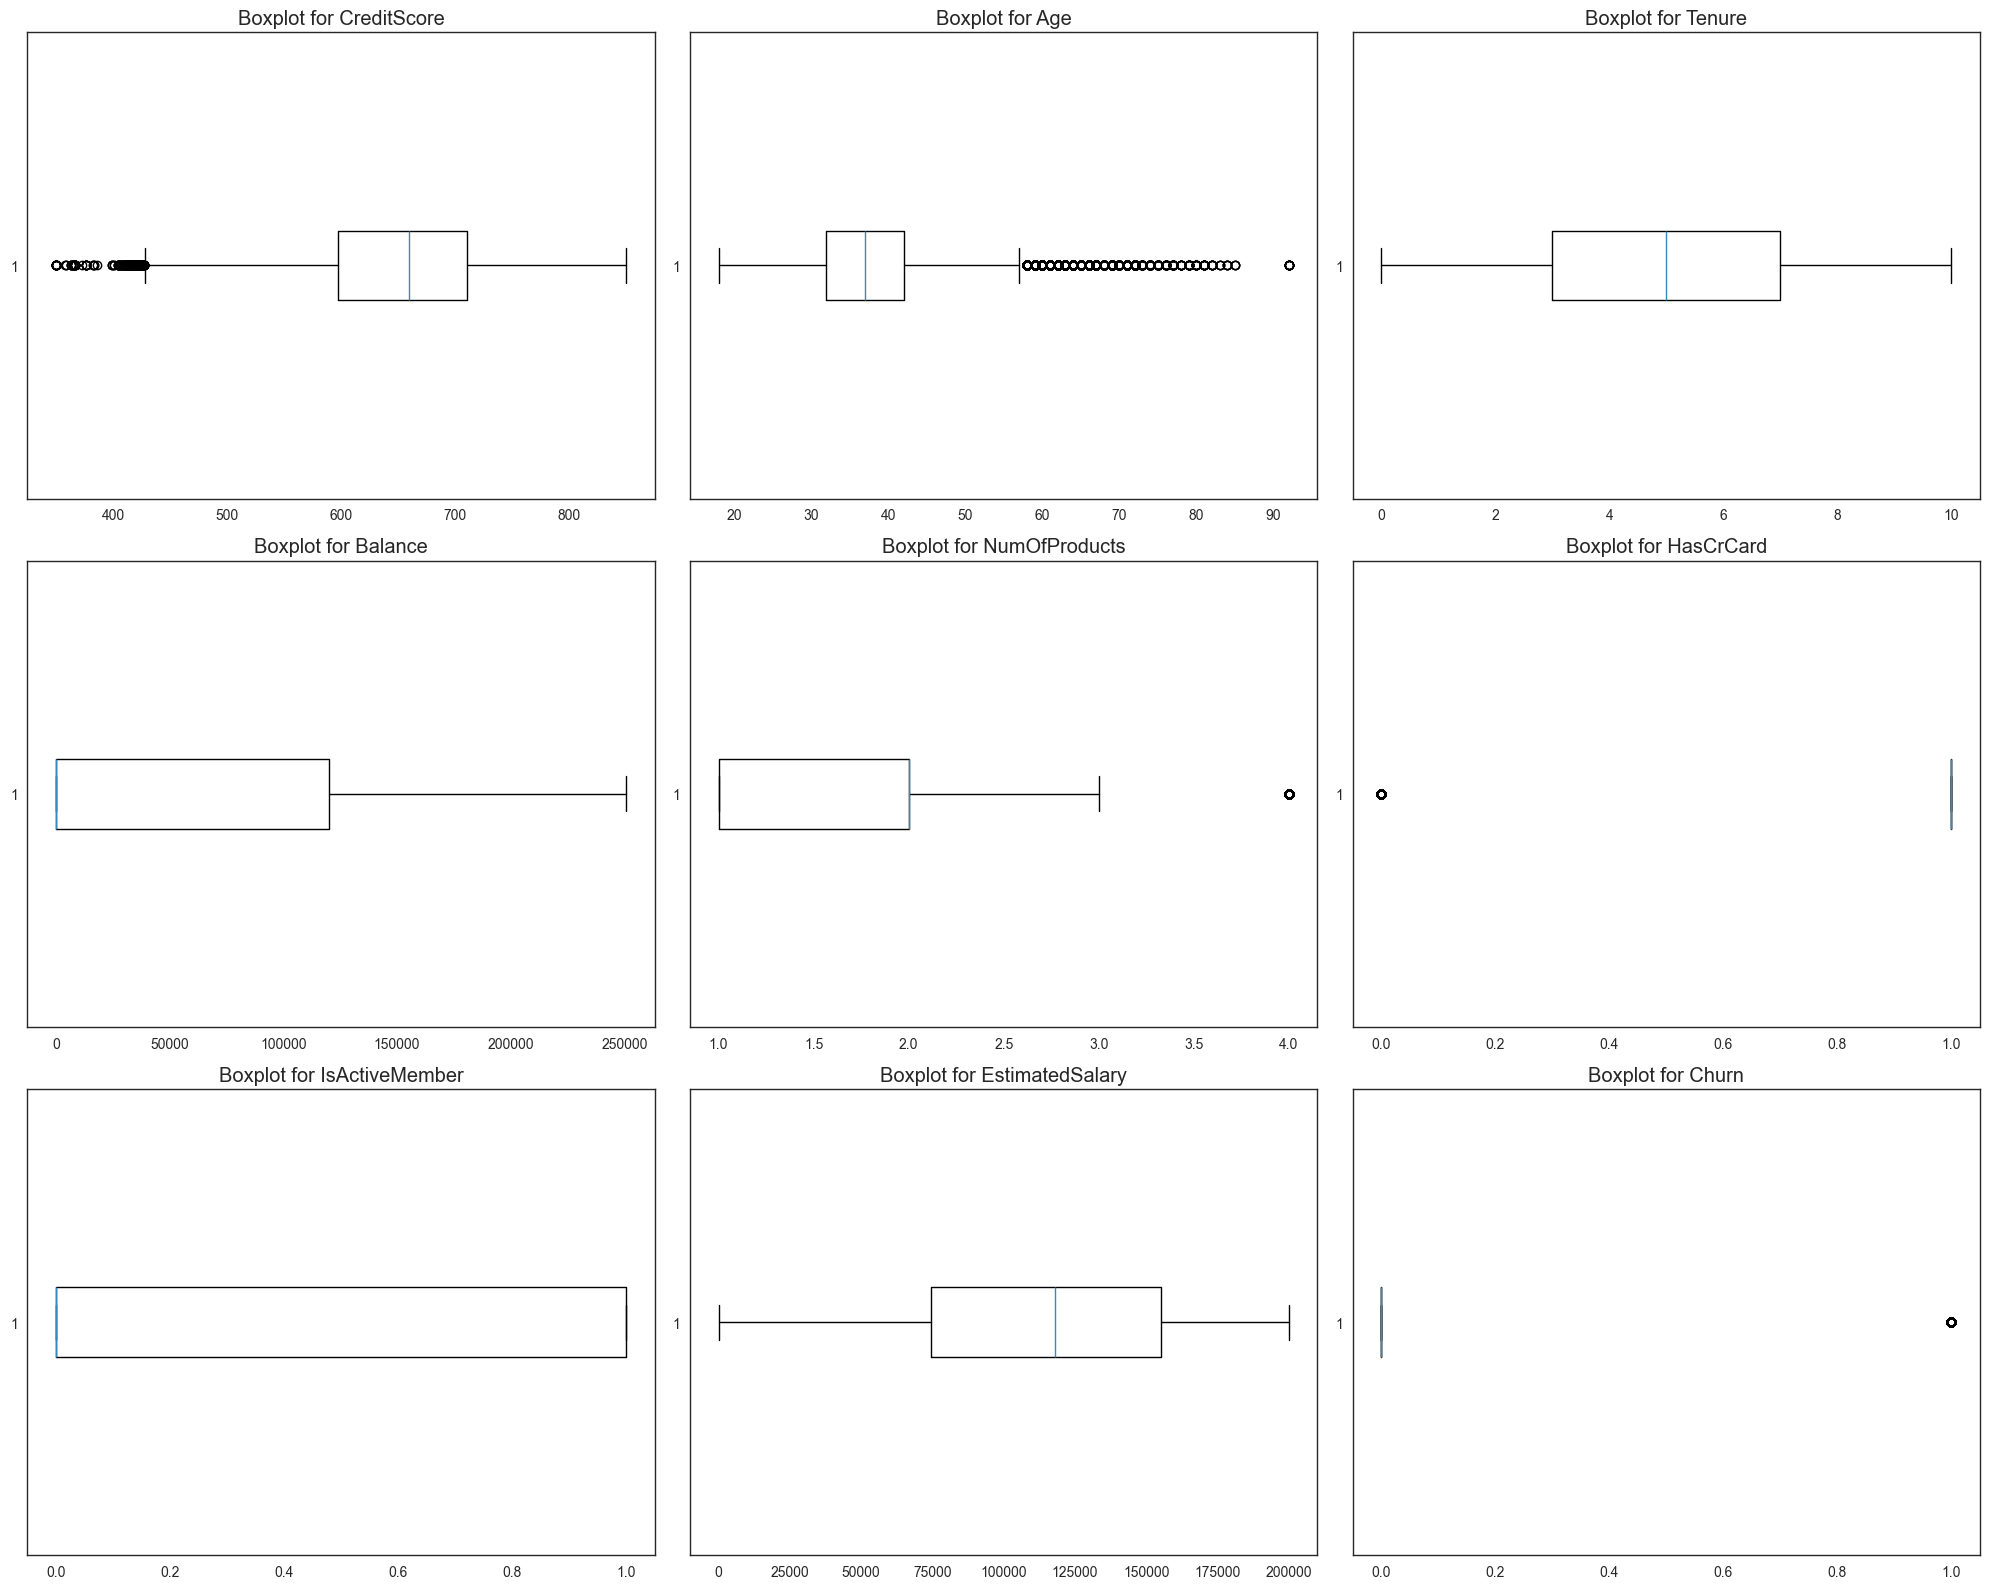

In [34]:
# for col in data_final[numerical_cols]:
#     sns.boxplot(data=data_final,x=col)
#     plt.title("Boxplot of" + str(col)) 

import math

# Example list of numerical variables
numerical_vars = numerical_cols
data = data_cleaned
# Calculate the optimal number of columns (assuming you want roughly square subplots)
num_vars = len(numerical_vars)
cols = int(math.ceil(math.sqrt(num_vars)))  # Use math.ceil to round up for uneven numbers
rows = math.ceil(num_vars / cols)  # Calculate rows based on columns

# Create the figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))  # Adjust figsize for better visualization

# Counter for current subplot index
plot_index = 0

# Loop through each variable name
for var_name in numerical_vars:
  # Check if the variable exists in the dataframe
  if var_name in data.columns:
    # Select the specific column
    var_data = data[var_name]

    # Access current subplot using plot_index
    ax = axes.flat[plot_index]  # Use axes.flat to access subplots as a 1D array

    # Create boxplot on current subplot
    ax.boxplot(var_data,vert=False)
    ax.set_title(f"Boxplot for {var_name}")

    # Increment plot index for next subplot
    plot_index += 1
  else:
    print(f"Warning: Column '{var_name}' not found in data")

# Adjust layout (optional)
plt.tight_layout()

# Display the figure with all subplots
plt.show()


In [35]:
for col in numerical_cols:
    p75 = data_cleaned[data_cleaned[col] > 0][col].quantile(0.75)
    p25 = data_cleaned[data_cleaned[col] > 0][col].quantile(0.25)
    iqr = p75 - p25
    upper_limit = p75 + (1.5 * iqr)
    print('===={} with Upper Limit {:6.1f}, P75 {:6.1f}, P25 {:6.1f}, {} Outlier Records ========'.format(col, upper_limit, p75, p25, data_cleaned[data_cleaned[col] > upper_limit]['Churn'].count()))
    data_cleaned[col] = np.where (data_cleaned[col] > upper_limit, upper_limit, data_cleaned[col])

====CreditScore with Upper Limit  879.5, P75  710.0, P25  597.0, 0 Outlier Records ========
====Age with Upper Limit   57.0, P75   42.0, P25   32.0, 6394 Outlier Records ========
====Tenure with Upper Limit   15.5, P75    8.0, P25    3.0, 0 Outlier Records ========
====Balance with Upper Limit 186618.0, P75 137781.6, P25 105224.1, 361 Outlier Records ========
====NumOfProducts with Upper Limit    3.5, P75    2.0, P25    1.0, 475 Outlier Records ========
====HasCrCard with Upper Limit    1.0, P75    1.0, P25    1.0, 0 Outlier Records ========
====IsActiveMember with Upper Limit    1.0, P75    1.0, P25    1.0, 0 Outlier Records ========
====EstimatedSalary with Upper Limit 275924.8, P75 155152.5, P25 74637.6, 0 Outlier Records ========
====Churn with Upper Limit    1.0, P75    1.0, P25    1.0, 0 Outlier Records ========


In [36]:
#Use for small datasets or if applicable
# sns.pairplot(data_cleaned[numerical_cols],hue='Churn') 


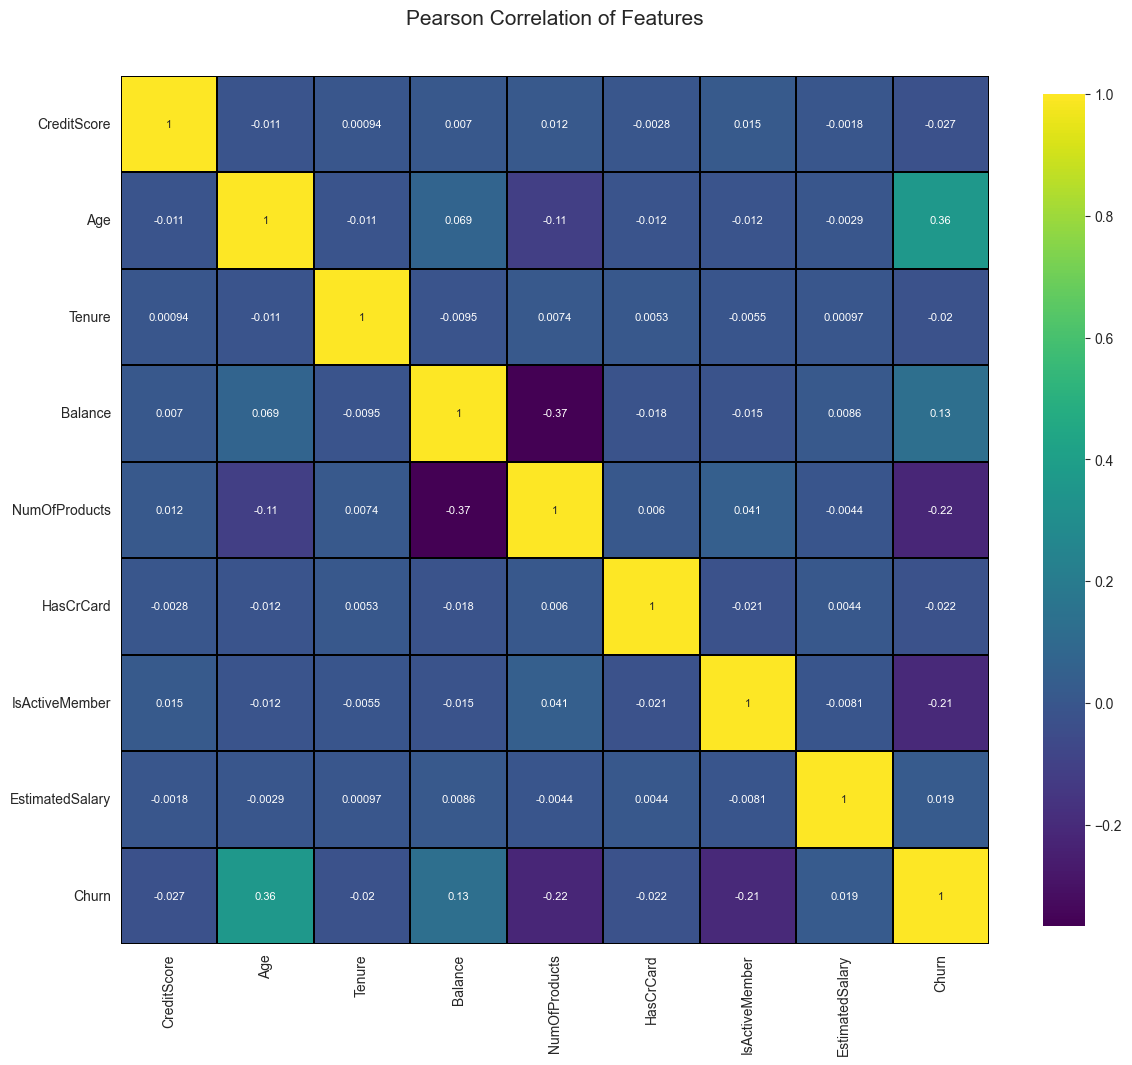

In [37]:
#correlation heatmap of dataset - Use for regression
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = "viridis"#sns.diverging_palette(220, 10, as_cmap = True)
    df = df.select_dtypes(include=[np.number]) #to filter only the numerical columns
    # df = df.iloc[:,:10]
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':8 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_cleaned)

<a id='data-transform'></a>
### Data Transformation
After the data has completed the pre-processing and EDA stage, the following data transformation will be performed:

1. Encoding Categorical Variables 
2. Feature Scaling

[Back to top](#back-to-top) <br>

In [38]:
#Mapping Yes/No Columns to 0 and 1
for col in data_cleaned[categorical_cols].columns:
    if len(data_cleaned[col].unique()) == 2 and 'No' in data_cleaned[col].to_list():
        try:    
            data_cleaned[col] = np.where(data_cleaned[col] =='No' ,0,1).astype('int64')
        except:
            data_cleaned[col] = np.where(data_cleaned[col] =='Unknown' ,0,1).astype('int64')
        finally:
            pass

        # print(col)
    

In [39]:
for col in data_cleaned[categorical_cols]:
    print("=="*20,'\n',data_cleaned[col].value_counts(),'\n')

 Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64 

 Gender
Male      93150
Female    71884
Name: count, dtype: int64 



In [40]:
#ONE HOT ENCODING/PD GET DUMMIES
data_final = pd.get_dummies(data = data_cleaned, columns = list(data_cleaned.select_dtypes(include=['object'])))

In [41]:
data_final.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [42]:
#Separate X(independent Variables) and Y(target/dependent variable)
X = data_final.drop(columns=['Churn'])
y = data_final['Churn']

<Axes: xlabel='Churn', ylabel='count'>

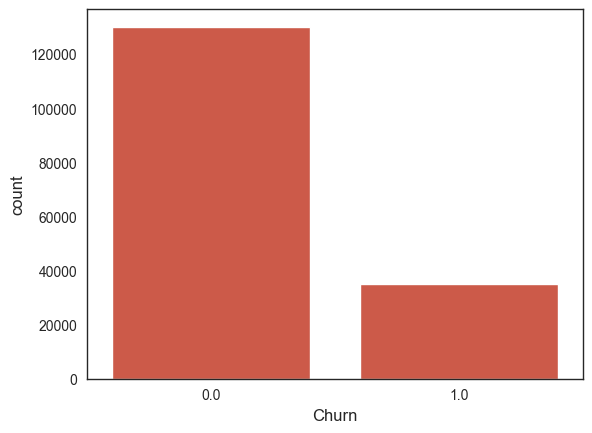

In [43]:
sns.countplot(data=data_final, x='Churn',linewidth=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42,stratify=y) 

In [45]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(132027, 13) (132027,) (33007, 13) (33007,)


In [46]:
# #FEATURE SCALING
# # scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler = RobustScaler()

# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_ros), columns = X_train_ros.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [47]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import NearMiss


# Perform random oversampling
# ros = RandomOverSampler(random_state=42)
# X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# us = NearMiss(version=3)
# sm = SMOTE(random_state=42)
# X_train_scaled, y_train = sm.fit_resample(X_train_scaled, y_train)
# X_train, y_train = sm.fit_resample(X_train, y_train)
# X_train_ros, y_train_ros = sm.fit_resample(X_train, y_train)

In [48]:
print(X_train_scaled.shape,y_train.shape)

(132027, 13) (132027,)


In [49]:
print(X_train_scaled.shape,X_test_scaled.shape)

(132027, 13) (33007, 13)


<a id='classification'></a>
### Model Building (Classification)
[Back to top](#back-to-top) <br>

In [50]:
def conf_matrix(actual, predicted, name):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="viridis")
    plt.title('Confusion Matrix for ' + str(name)); 
    plt.figure()
    plt.rcParams['figure.dpi']=100
    plt.show()
    return cm

In [51]:
def plot_roc(actual, predicted, model_name):
    
    fpr, tpr, thr = roc_curve(actual, predicted,pos_label=1)
    # fig, ax = plt.subplots(figsize=(8, 8))
    plt.plot(fpr, tpr, 'k-',label=f"{model_name} (AUC = {roc_auc_score(actual,predicted)*100:.2f}%)")
    plt.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    # ax.grid(True)
    plt.style.use('ggplot')
    plt.title('ROC Curve(test) for ' + str(model_name))
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.legend(loc='best')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')
    # plt.rcParams['figure.dpi']=100
    plt.show()
    

### Feature Selection

In [52]:
# instantiate model
# model = RandomForestClassifier(n_estimators=100, random_state=0)
# # select features
# selector = SequentialFeatureSelector(estimator=model, n_features_to_select=10, direction='backward', cv=2)
# selector.fit_transform(X_train_scaled,y_train)
# # check names of features selected
# selected_features = np.array(X_train_scaled.columns)
# selected_features[selector.get_support()]

In [53]:
# from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

# select top 2 features using chi2
# selector = SelectKBest(chi2, k=2)
# X_new = selector.fit_transform(X, y)
# print(X_new)

# select top 2 features using f_classif
# selector = SelectKBest(f_classif, k=2)
# X_new = selector.fit_transform(X, y)
# print(X_new)

# # select top 2 features using mutual_info_classif
# selector = SelectKBest(mutual_info_classif, k=10)
# selector.fit_transform(X_train_scaled, y_train)
# selected_features = selector.get_feature_names_out()
# print(selected_features)

In [54]:
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# # clf.fit(X_train_scaled, y_train)

# X_train_random = X_train_scaled.copy()
# X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train_scaled.shape[0])

# rf_random = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_random.fit(X_train_random, y_train)

# global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
# global_importances_random.sort_values(ascending=False, inplace=True)

In [55]:
# rf_imp = pd.DataFrame(global_importances_random).reset_index().rename(columns={'index':'Feature'})
# rf_imp.columns = ['Features','Importance']
# rf_imp

# for index, row in rf_imp.iterrows():
#     if ((row['Features'] != 'RANDOM') and (row['Importance'] > 0.01)) :
#       # Drop all rows after the current index (inclusive)
#       selected_features_df = pd.DataFrame(rf_imp.iloc[:index])  # Keep the row with the stop string

# selected_features_df
# selected_features = selected_features_df['Features'].tolist()

In [56]:
# try:
#     selected_features.remove('RANDOM')
# except:
#     print(selected_features)

In [57]:
# X_train_scaled = X_train_scaled[selected_features]
# X_test_scaled = X_test_scaled[selected_features]

### Model Comparisons <a class="anchor" id="sec6.0"></a>

In [58]:
#creating dictionary for storing different models accuracy
model_comparison={}

#list of models
models = [

    #Trees    
    ('DecisionTree',tree.DecisionTreeClassifier()),

    #Xgboost:
    ('XGBoost',XGBClassifier()),

    #Ensemble Methods
    ('Adaboost',ensemble.AdaBoostClassifier()),
    ('Bagging',ensemble.BaggingClassifier()),
    ('ExtraTrees',ensemble.ExtraTreesClassifier()),
    # ('GBC',ensemble.GradientBoostingClassifier()),
    ('Hist Gbc', ensemble.HistGradientBoostingClassifier()),
    ('Random Forest',ensemble.RandomForestClassifier()),

    #Gaussian Processes
    # ('GaussianPC',gaussian_process.GaussianProcessClassifier()),
    
    #GLM
    ('Logistic Regression',linear_model.LogisticRegression()),
    # ('PassiveAggressive',linear_model.PassiveAggressiveClassifier()),
    # ('Ridge',linear_model.RidgeClassifier()),
    # ('SGDC',linear_model.SGDClassifier()),
    # ('Perceptron',linear_model.Perceptron()),
    
    #Navies Bayes
    ('BernoulliNB',naive_bayes.BernoulliNB()),
    ('GaussianNB',naive_bayes.GaussianNB()),
    
    #Nearest Neighbor
    ('KNN',neighbors.KNeighborsClassifier()),
    
    #SVM
    # ('SVC', svm.SVC(probability=True)),
    # ('NuSVC', svm.NuSVC(probability=True)),
    # ('LinearSVC',svm.LinearSVC()),
    
    #Discriminant Analysis
    ('LDA',discriminant_analysis.LinearDiscriminantAnalysis()),
    ('QDA',discriminant_analysis.QuadraticDiscriminantAnalysis()),

] 


# #creating dictionary for storing different models accuracy
# model_comparison={}

# #list of models
# models = [

#     #Trees    
#     ('DecisionTree',tree.DecisionTreeClassifier(class_weight='balanced')),

#     #Xgboost:
#     # ('XGBoost',XGBClassifier()),
#     ('XGBoost',XGBClassifier(scale_pos_weight=1)),

#     #Ensemble Methods
#     ('Adaboost',ensemble.AdaBoostClassifier()),
#     ('Bagging',ensemble.BaggingClassifier()),
#     ('ExtraTrees',ensemble.ExtraTreesClassifier(class_weight='balanced')),
#     # ('GBC',ensemble.GradientBoostingClassifier()),
#     ('Hist Gbc', ensemble.HistGradientBoostingClassifier(class_weight='balanced')),
#     ('Random Forest',ensemble.RandomForestClassifier(class_weight='balanced')),

#     #Gaussian Processes
#     # ('GaussianPC',gaussian_process.GaussianProcessClassifier()),
    
#     #GLM
#     ('Logistic Regression',linear_model.LogisticRegression(class_weight='balanced')),
#     # ('PassiveAggressive',linear_model.PassiveAggressiveClassifier()),
#     # ('Ridge',linear_model.RidgeClassifier()),
#     # ('SGDC',linear_model.SGDClassifier()),
#     # ('Perceptron',linear_model.Perceptron()),
    
#     #Navies Bayes
#     ('BernoulliNB',naive_bayes.BernoulliNB()),
#     ('GaussianNB',naive_bayes.GaussianNB()),
    
#     #Nearest Neighbor
#     ('KNN',neighbors.KNeighborsClassifier()),
    
#     #SVM
#     # ('SVC', svm.SVC(probability=True)),
#     # ('NuSVC', svm.NuSVC(probability=True)),
#     # ('LinearSVC',svm.LinearSVC()),
    
#     #Discriminant Analysis
#     ('LDA',discriminant_analysis.LinearDiscriminantAnalysis()),
#     ('QDA',discriminant_analysis.QuadraticDiscriminantAnalysis()),

# ] 





DecisionTree
Train Accuracy : 99.97%
Test Accuracy : 79.75%
Train Precision : 99.86%
Test Precision : 54.02%
Train Recall : 100.00%
Test Recall : 52.06%
Train F1-Score : 99.93%
Test F1-Score : 53.03%
Train ROC-AUC : 100.00%
Test ROC-AUC : 70.36%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104128
         1.0       1.00      1.00      1.00     27899

    accuracy                           1.00    132027
   macro avg       1.00      1.00      1.00    132027
weighted avg       1.00      1.00      1.00    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.87      0.88      0

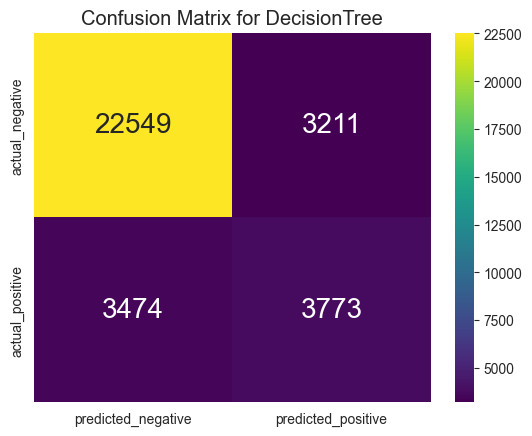

<Figure size 640x480 with 0 Axes>

[[22549  3211]
 [ 3474  3773]]




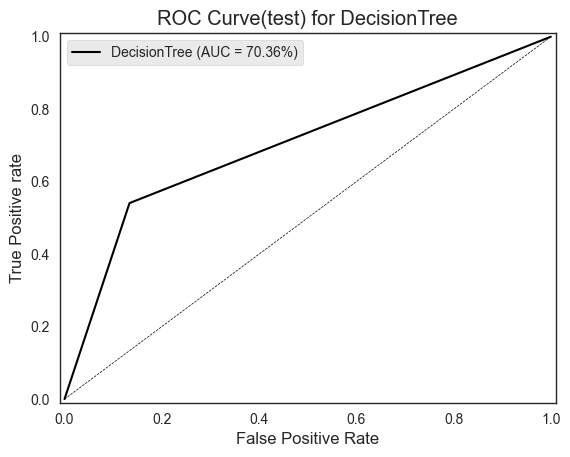

None


XGBoost
Train Accuracy : 88.20%
Test Accuracy : 86.36%
Train Precision : 60.20%
Test Precision : 55.58%
Train Recall : 79.06%
Test Recall : 73.48%
Train F1-Score : 68.35%
Test F1-Score : 63.29%
Train ROC-AUC : 91.64%
Test ROC-AUC : 88.64%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

           0       0.96      0.90      0.93    110752
           1       0.60      0.79      0.68     21275

    accuracy                           0.88    132027
   macro avg       0.78      0.85      0.81    132027
weighted avg       0.90      0.88      0.89    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

           0       0.95      0.89      0

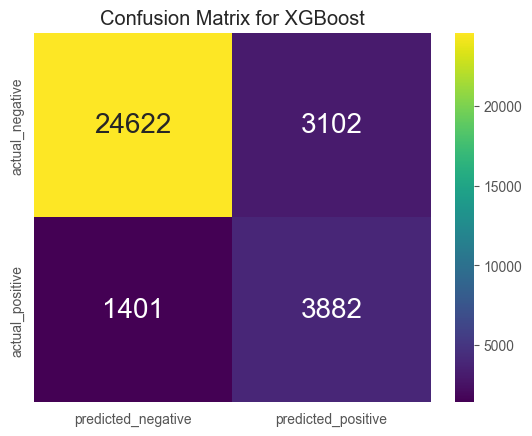

<Figure size 640x480 with 0 Axes>

[[24622  3102]
 [ 1401  3882]]




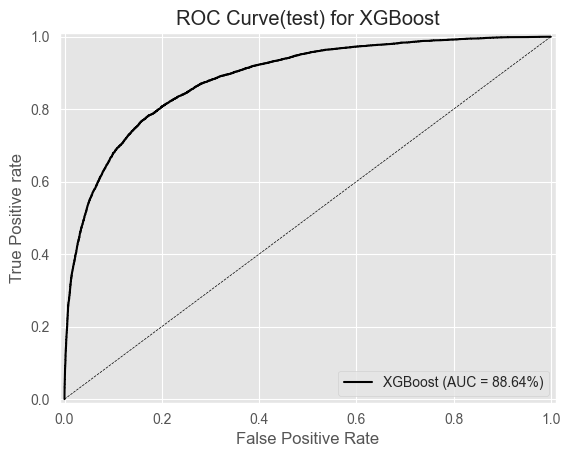

None


Adaboost
Train Accuracy : 86.06%
Test Accuracy : 86.03%
Train Precision : 52.64%
Test Precision : 52.25%
Train Recall : 73.95%
Test Recall : 74.08%
Train F1-Score : 61.50%
Test F1-Score : 61.28%
Train ROC-AUC : 88.01%
Test ROC-AUC : 87.97%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.91    112143
         1.0       0.53      0.74      0.62     19884

    accuracy                           0.86    132027
   macro avg       0.74      0.81      0.76    132027
weighted avg       0.89      0.86      0.87    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.95      0.88      

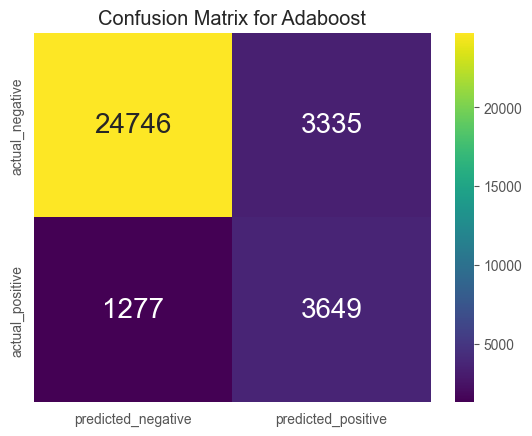

<Figure size 640x480 with 0 Axes>

[[24746  3335]
 [ 1277  3649]]




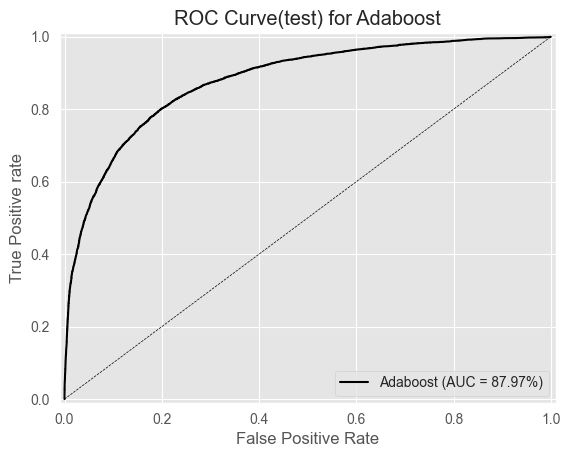

None


Bagging
Train Accuracy : 98.55%
Test Accuracy : 84.82%
Train Precision : 93.80%
Test Precision : 50.09%
Train Recall : 99.31%
Test Recall : 69.64%
Train F1-Score : 96.48%
Test F1-Score : 58.27%
Train ROC-AUC : 99.93%
Test ROC-AUC : 84.07%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    105640
         1.0       0.94      0.99      0.96     26387

    accuracy                           0.99    132027
   macro avg       0.97      0.99      0.98    132027
weighted avg       0.99      0.99      0.99    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.94      0.88      0

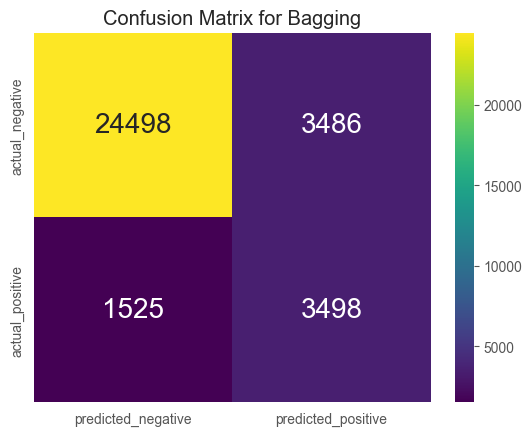

<Figure size 640x480 with 0 Axes>

[[24498  3486]
 [ 1525  3498]]




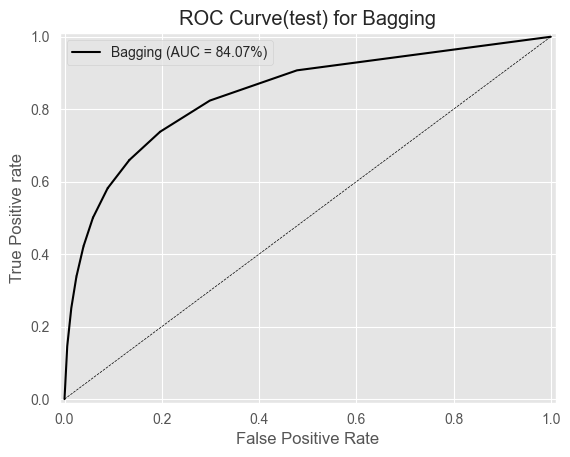

None


ExtraTrees
Train Accuracy : 99.97%
Test Accuracy : 85.46%
Train Precision : 99.86%
Test Precision : 52.59%
Train Recall : 100.00%
Test Recall : 71.18%
Train F1-Score : 99.93%
Test F1-Score : 60.49%
Train ROC-AUC : 100.00%
Test ROC-AUC : 86.53%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104128
         1.0       1.00      1.00      1.00     27899

    accuracy                           1.00    132027
   macro avg       1.00      1.00      1.00    132027
weighted avg       1.00      1.00      1.00    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.94      0.88  

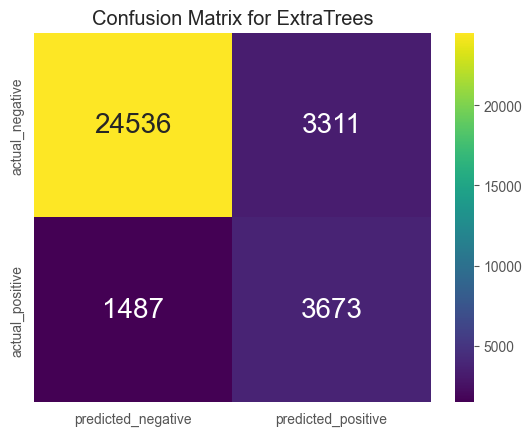

<Figure size 640x480 with 0 Axes>

[[24536  3311]
 [ 1487  3673]]




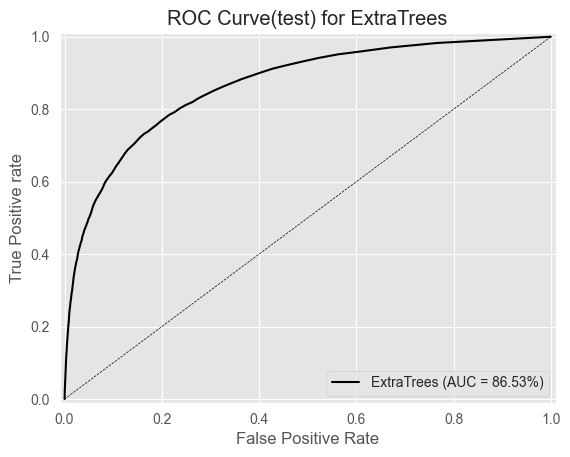

None


Hist Gbc
Train Accuracy : 86.87%
Test Accuracy : 86.52%
Train Precision : 56.37%
Test Precision : 55.24%
Train Recall : 75.37%
Test Recall : 74.48%
Train F1-Score : 64.50%
Test F1-Score : 63.43%
Train ROC-AUC : 89.72%
Test ROC-AUC : 88.89%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       0.95      0.89      0.92    111131
         1.0       0.56      0.75      0.65     20896

    accuracy                           0.87    132027
   macro avg       0.76      0.82      0.78    132027
weighted avg       0.89      0.87      0.88    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.95      0.89      

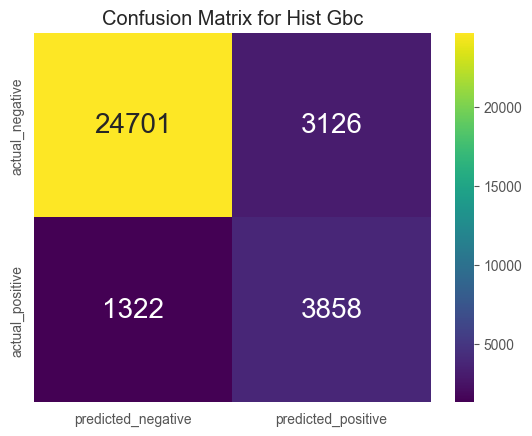

<Figure size 640x480 with 0 Axes>

[[24701  3126]
 [ 1322  3858]]




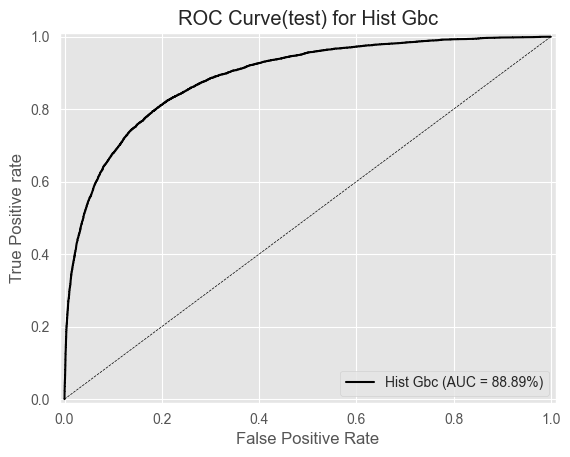

None


Random Forest
Train Accuracy : 99.97%
Test Accuracy : 85.73%
Train Precision : 99.91%
Test Precision : 53.25%
Train Recall : 99.94%
Test Recall : 72.02%
Train F1-Score : 99.92%
Test F1-Score : 61.23%
Train ROC-AUC : 100.00%
Test ROC-AUC : 87.14%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104099
         1.0       1.00      1.00      1.00     27928

    accuracy                           1.00    132027
   macro avg       1.00      1.00      1.00    132027
weighted avg       1.00      1.00      1.00    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.94      0.88

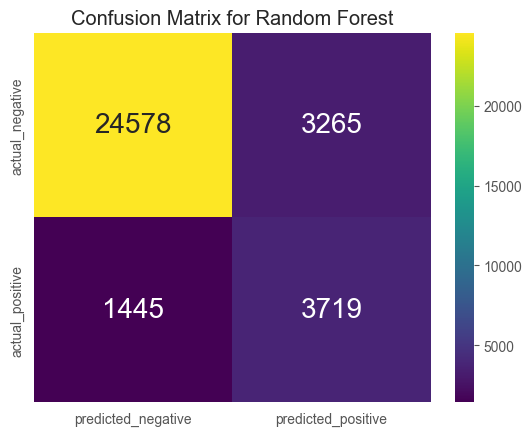

<Figure size 640x480 with 0 Axes>

[[24578  3265]
 [ 1445  3719]]




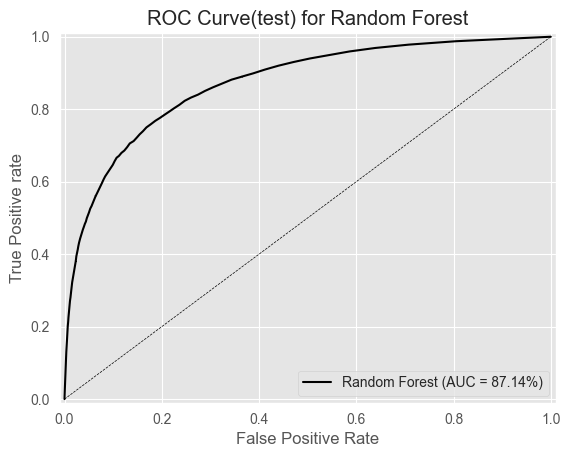

None


Logistic Regression
Train Accuracy : 83.99%
Test Accuracy : 83.87%
Train Precision : 40.93%
Test Precision : 40.61%
Train Recall : 71.15%
Test Recall : 70.71%
Train F1-Score : 51.97%
Test F1-Score : 51.59%
Train ROC-AUC : 82.47%
Test ROC-AUC : 82.13%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       0.96      0.86      0.90    115954
         1.0       0.41      0.71      0.52     16073

    accuracy                           0.84    132027
   macro avg       0.68      0.78      0.71    132027
weighted avg       0.89      0.84      0.86    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.95     

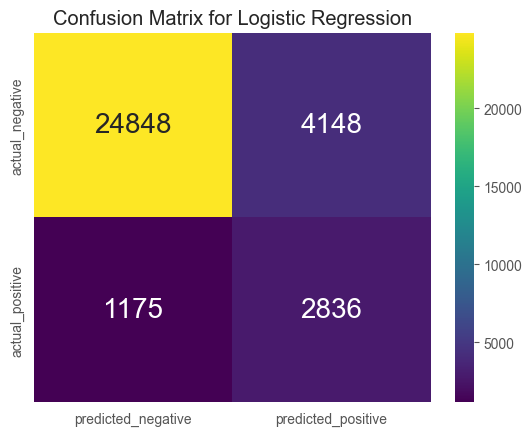

<Figure size 640x480 with 0 Axes>

[[24848  4148]
 [ 1175  2836]]




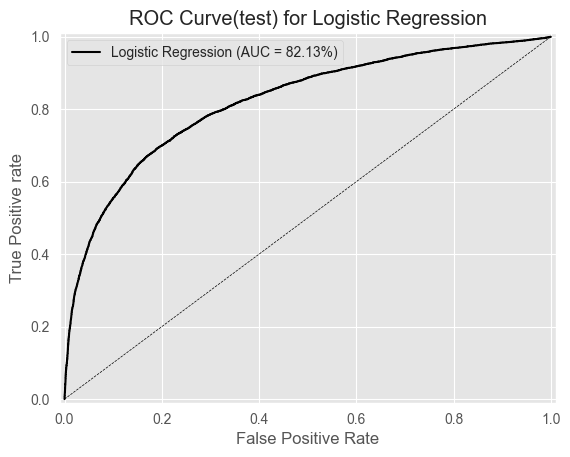

None


BernoulliNB
Train Accuracy : 81.73%
Test Accuracy : 81.64%
Train Precision : 35.53%
Test Precision : 35.41%
Train Recall : 61.88%
Test Recall : 61.47%
Train F1-Score : 45.14%
Test F1-Score : 44.94%
Train ROC-AUC : 79.86%
Test ROC-AUC : 79.73%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89    115989
         1.0       0.36      0.62      0.45     16038

    accuracy                           0.82    132027
   macro avg       0.65      0.73      0.67    132027
weighted avg       0.87      0.82      0.84    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.94      0.84   

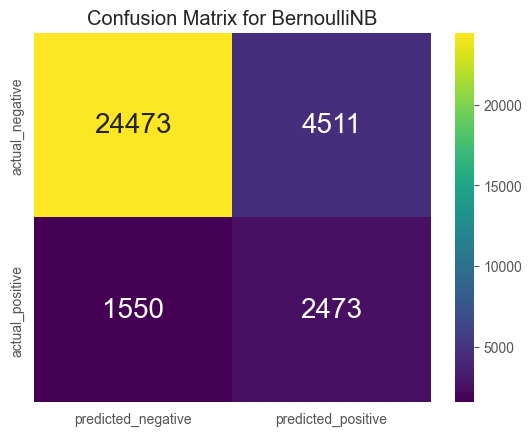

<Figure size 640x480 with 0 Axes>

[[24473  4511]
 [ 1550  2473]]




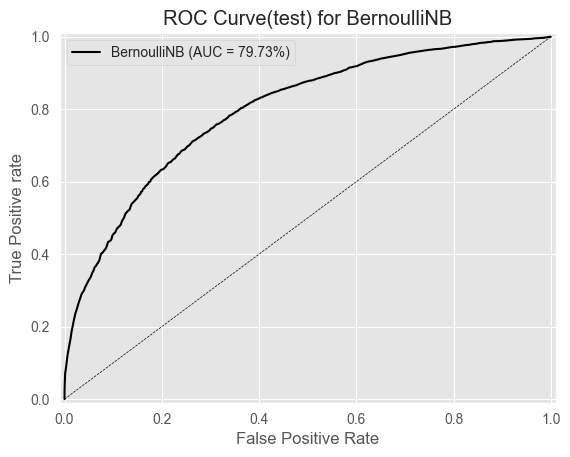

None


GaussianNB
Train Accuracy : 80.85%
Test Accuracy : 80.74%
Train Precision : 49.77%
Test Precision : 49.70%
Train Recall : 55.29%
Test Recall : 54.96%
Train F1-Score : 52.38%
Test F1-Score : 52.20%
Train ROC-AUC : 81.75%
Test ROC-AUC : 81.52%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88    106879
         1.0       0.50      0.55      0.52     25148

    accuracy                           0.81    132027
   macro avg       0.69      0.71      0.70    132027
weighted avg       0.82      0.81      0.81    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.89      0.87    

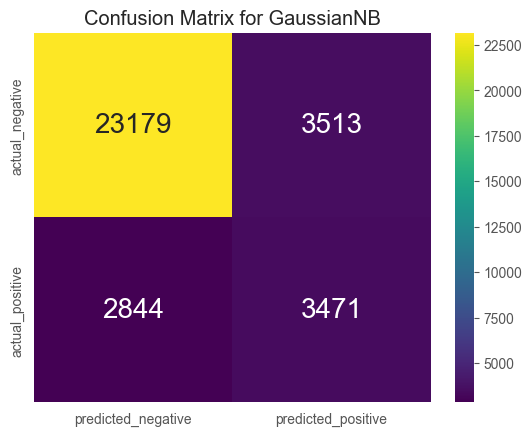

<Figure size 640x480 with 0 Axes>

[[23179  3513]
 [ 2844  3471]]




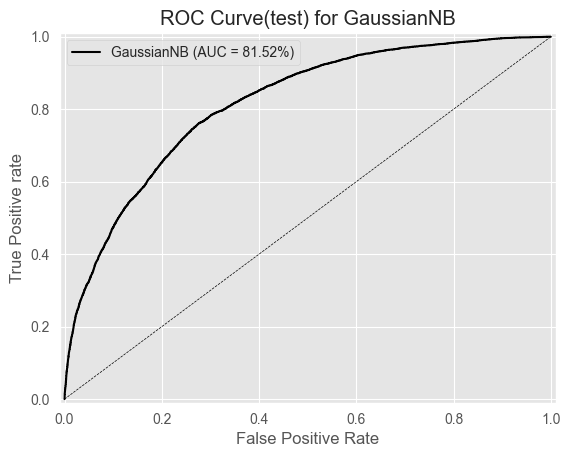

None


KNN
Train Accuracy : 88.47%
Test Accuracy : 84.54%
Train Precision : 62.43%
Test Precision : 52.61%
Train Recall : 78.66%
Test Recall : 67.22%
Train F1-Score : 69.61%
Test F1-Score : 59.02%
Train ROC-AUC : 93.73%
Test ROC-AUC : 82.56%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.93    109852
         1.0       0.62      0.79      0.70     22175

    accuracy                           0.88    132027
   macro avg       0.79      0.85      0.81    132027
weighted avg       0.90      0.88      0.89    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.93      0.88      0.90 

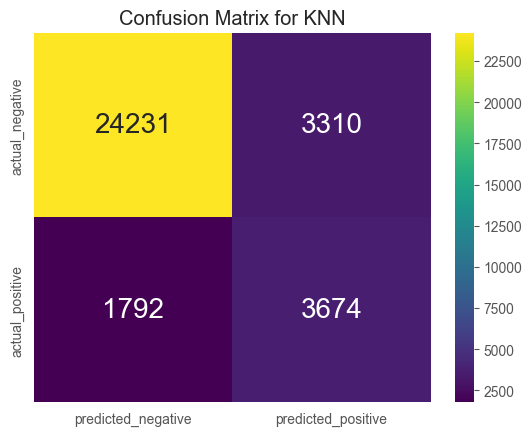

<Figure size 640x480 with 0 Axes>

[[24231  3310]
 [ 1792  3674]]




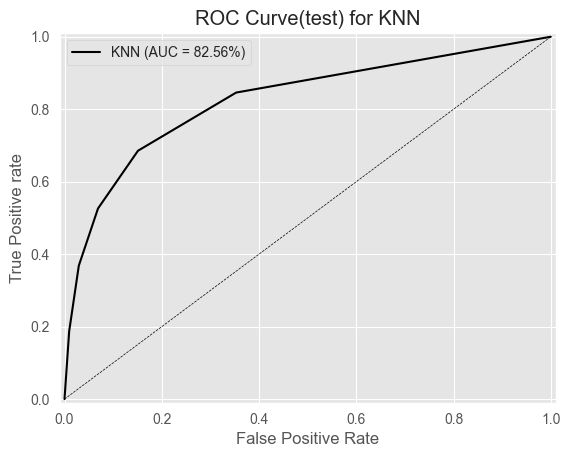

None


LDA
Train Accuracy : 83.92%
Test Accuracy : 83.83%
Train Precision : 43.51%
Test Precision : 43.49%
Train Recall : 69.06%
Test Recall : 68.62%
Train F1-Score : 53.38%
Test F1-Score : 53.23%
Train ROC-AUC : 82.42%
Test ROC-AUC : 82.09%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.90    114426
         1.0       0.44      0.69      0.53     17601

    accuracy                           0.84    132027
   macro avg       0.69      0.78      0.72    132027
weighted avg       0.88      0.84      0.85    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.90 

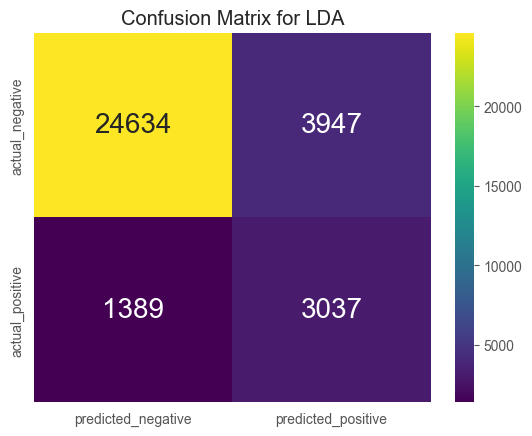

<Figure size 640x480 with 0 Axes>

[[24634  3947]
 [ 1389  3037]]




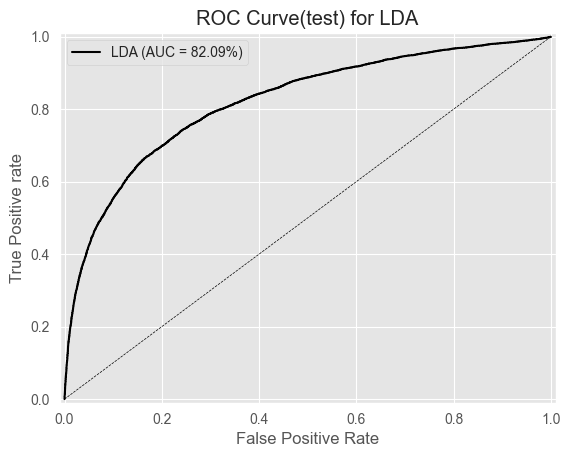

None


QDA
Train Accuracy : 70.72%
Test Accuracy : 70.75%
Train Precision : 49.55%
Test Precision : 49.91%
Train Recall : 36.04%
Test Recall : 36.15%
Train F1-Score : 41.73%
Test F1-Score : 41.93%
Train ROC-AUC : 66.26%
Test ROC-AUC : 66.24%


----------------------------------------------------------------------------------------------------
Train Report
               precision    recall  f1-score   support

         0.0       0.76      0.85      0.80     93618
         1.0       0.50      0.36      0.42     38409

    accuracy                           0.71    132027
   macro avg       0.63      0.60      0.61    132027
weighted avg       0.69      0.71      0.69    132027

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Test Report
               precision    recall  f1-score   support

         0.0       0.76      0.85      0.80 

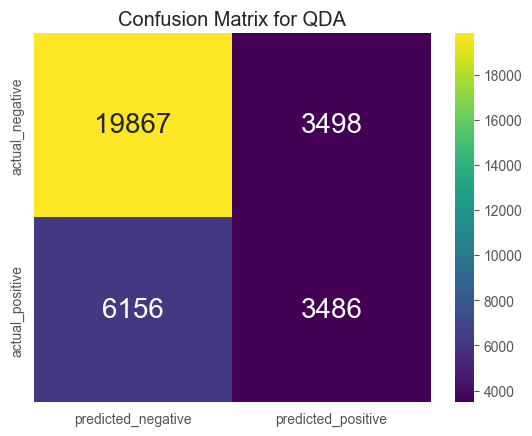

<Figure size 640x480 with 0 Axes>

[[19867  3498]
 [ 6156  3486]]




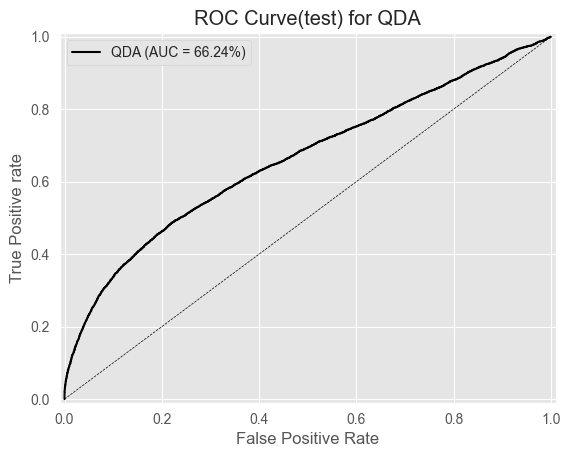

None




In [59]:
for name, model in models:
    
    classifier = model

    classifier.fit(X_train_scaled,y_train)
    
    # y_train1 = np.array(y_train).reshape((-1,1))
    # y_test1 = np.array(y_test).reshape((-1,1))

    y_train_pred=classifier.predict(X_train_scaled)
    y_pred=classifier.predict(X_test_scaled)
    y_pred_prob = classifier.predict_proba(X_test_scaled)[:,1]

    train_accuracy = accuracy_score(y_train_pred,y_train)
    test_accuracy = accuracy_score(y_pred,y_test)
    # cv_accuracy = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = 10, scoring='accuracy')

    train_precision = precision_score(y_train_pred,y_train)
    test_precision = precision_score(y_pred,y_test)
    # cv_precision = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = 10, scoring='precision')

    train_recall = recall_score(y_train_pred,y_train)
    test_recall = recall_score(y_pred,y_test)
    # cv_recall = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = 10, scoring='recall')

    train_f1 = f1_score(y_train_pred,y_train)
    test_f1 = f1_score(y_pred,y_test)
    # cv_f1 = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = 10, scoring='f1')

    train_roc_auc = roc_auc_score(y_train,classifier.predict_proba(X_train_scaled)[:,1])
    test_roc_auc = roc_auc_score(y_test,classifier.predict_proba(X_test_scaled)[:,1])

    start = "\033[1m"
    end = "\033[0;0m"
    
    print(start + name + end)
    print('='*30)
    print(f"Train Accuracy : {train_accuracy*100:.2f}%")
    print(f"Test Accuracy : {test_accuracy*100:.2f}%")
    # print(f"CV Test Accuracy : {cv_accuracy.mean()*100:.2f}%")

    print('='*30)
    print(f"Train Precision : {train_precision*100:.2f}%")
    print(f"Test Precision : {test_precision*100:.2f}%")
    # print(f"CV Test Precision : {cv_precision.mean()*100:.2f}%")
    print('='*30)
    
    print(f"Train Recall : {train_recall*100:.2f}%")
    print(f"Test Recall : {test_recall*100:.2f}%")
    # print(f"CV Test Recall : {cv_recall.mean()*100:.2f}%")
    print('='*30)
    
    print(f"Train F1-Score : {train_f1*100:.2f}%")
    print(f"Test F1-Score : {test_f1*100:.2f}%")
    # print(f"CV Test F1-Score : {cv_f1.mean()*100:.2f}%")
    print('='*30)

    # print(f"Train ROC : {roc_auc_score(y_train,classifier.predict_proba(X_train_scaled)[:, 1])*100:.2f}%")
    print(f"Train ROC-AUC : {train_roc_auc*100:.2f}%")
    print(f"Test ROC-AUC : {test_roc_auc*100:.2f}%")
    print('='*30)
    
    print('\n')
    # print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('-'*100)
    print('Train Report''\n',classification_report(y_train_pred,y_train))
    print('-'*100)

    print('-'*100)
    print('Test Report''\n',classification_report(y_pred,y_test))
    print('-'*100)

    print(conf_matrix(y_pred,y_test,name))
    print('\n')

    print(plot_roc(y_test, y_pred_prob, name))
    
    print('\n')
    model_comparison[name]={
                            'Train_Accuracy':train_accuracy,
                            'Test_Accuracy':test_accuracy,
                            # 'CV_Test_Accuracy':cv_accuracy.mean(),
                            'Train_Precision':train_precision,
                            'Test_Precision': test_precision,
                            # 'CV_Test_Precision':cv_precision.mean(),
                            'Train Recall': train_recall,
                            'Test Recall': test_recall,
                            # 'CV_Test_Recall':cv_recall.mean(),
                            'Train F1-Score': train_f1,
                            'Test F1-Score': test_f1,
                            # 'CV_Test_F1-Score':cv_f1.mean(),
                            'Train ROC-AUC': train_roc_auc,
                            'Test ROC-AUC': test_roc_auc,
                            'Params': str(model.get_params())
                            }

In [60]:
def convert_to_numeric(df):
  
  ignore_columns = ['Model', 'Params']
  cols_to_convert = list(df.columns)

  # Convert lists to sets for efficient difference operation
  set1 = set(cols_to_convert)
  set2 = set(ignore_columns)

  # Elements in list1 but not in list2 (using set difference)
  difference = set1 - set2
  not_in_list2 = list(difference)
  not_in_list2

  # # Loop through the columns and convert them to numeric (handling errors)
  for col in not_in_list2:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Coerce errors to NaN
  return df


In [64]:
models_summary = pd.DataFrame(model_comparison).T.reset_index().rename(columns={'index':'Model'})
models_summary = convert_to_numeric(models_summary)
models_summary.sort_values(by = ['Test Recall'], ascending = False, inplace = True)
models_summary

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train ROC-AUC,Test ROC-AUC,Params
5,Hist Gbc,0.868701,0.865241,0.563733,0.552405,0.753685,0.744788,0.645015,0.634331,0.897228,0.888934,"{'categorical_features': 'warn', 'class_weight..."
2,Adaboost,0.860551,0.860272,0.526363,0.522480,0.739539,0.740763,0.615002,0.612762,0.880059,0.879722,"{'algorithm': 'SAMME.R', 'estimator': None, 'l..."
1,XGBoost,0.882039,0.863574,0.602033,0.555842,0.790552,0.734810,0.683532,0.632918,0.916388,0.886407,"{'objective': 'binary:logistic', 'base_score':..."
6,Random Forest,0.999674,0.857303,0.999069,0.532503,0.999391,0.720178,0.999230,0.612282,0.999999,0.871448,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
4,ExtraTrees,0.999712,0.854637,0.998640,0.525916,1.000000,0.711822,0.999319,0.604908,1.000000,0.865313,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_..."
7,Logistic Regression,0.839896,0.838731,0.409350,0.406071,0.711504,0.707056,0.519700,0.515871,0.824681,0.821278,"{'C': 1.0, 'class_weight': None, 'dual': False..."
3,Bagging,0.985518,0.848184,0.938039,0.500859,0.993141,0.696397,0.964804,0.582660,0.999301,0.840654,"{'bootstrap': True, 'bootstrap_features': Fals..."
11,LDA,0.839215,0.838337,0.435086,0.434851,0.690586,0.686173,0.533840,0.532340,0.824223,0.820867,"{'covariance_estimator': None, 'n_components':..."
10,KNN,0.884660,0.845427,0.624333,0.526060,0.786561,0.672155,0.696121,0.590201,0.937329,0.825621,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
8,BernoulliNB,0.817272,0.816372,0.355264,0.354095,0.618843,0.614715,0.451393,0.449350,0.798576,0.797260,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':..."


In [65]:
models_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 5 to 12
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            13 non-null     object 
 1   Train_Accuracy   13 non-null     float64
 2   Test_Accuracy    13 non-null     float64
 3   Train_Precision  13 non-null     float64
 4   Test_Precision   13 non-null     float64
 5   Train Recall     13 non-null     float64
 6   Test Recall      13 non-null     float64
 7   Train F1-Score   13 non-null     float64
 8   Test F1-Score    13 non-null     float64
 9   Train ROC-AUC    13 non-null     float64
 10  Test ROC-AUC     13 non-null     float64
 11  Params           13 non-null     object 
dtypes: float64(10), object(2)
memory usage: 1.3+ KB


### Cross Validation

In [66]:
model_comparison2 = {}

In [71]:
for name, model in models:
    
    classifier = model

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

    # classifier.fit(X_train_scaled,y_train)

    # y_pred=classifier.predict(X_test_scaled)
    # y_train_pred=classifier.predict(X_train_scaled)


    # cv_accuracy = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = skf, scoring='accuracy')

    # cv_precision = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = skf, scoring='precision')

    cv_recall = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = skf, scoring='recall')

    cv_f1 = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = skf, scoring='f1')

    # cv_roc_auc = cross_val_score(estimator = classifier, X = X_train_scaled, y = y_train, cv = skf, scoring='roc_auc')


    start = "\033[1m"
    end = "\033[0;0m"
    
    print(start + name + end)
    print('='*30)
    # print("Cross Val Accuracy(Mean): {:.2f} %".format(cv_accuracy.mean()*100))
    # print('='*30)
    
    # print("Cross Val Precision(Mean): {:.2f} %".format(cv_precision.mean()*100))
    # print('='*30)
    
    print("Cross Val Recall(Mean): {:.2f} %".format(cv_recall.mean()*100))
    print('='*30)

    print("Cross Val F1(Mean): {:.2f} %".format(cv_f1.mean()*100))
    print('='*30)

    # print("Cross Val ROC-AUC(Mean): {:.2f} %".format(cv_roc_auc.mean()*100))
    # print('='*30)
    print('\n')

    # cv_1 = pd.DataFrame(cv_accuracy)
    # cv_2 = pd.DataFrame(cv_precision)
    # cv_3 = pd.DataFrame(cv_recall)
    # cv_4 = pd.DataFrame(cv_f1)

    # cv_final = pd.concat([cv_1,cv_2,cv_3,cv_4],axis=1).reset_index(drop=True)
    # cv_final['Model'] = name
    # cv_final.columns=['Model','CV_Acc','CV_Prec','CV_Rec','CV_F1']
    # print(cv_final)
    # print('\n')
    
    model_comparison2[name]={
                            # 'CV_Accuracy':cv_accuracy,
                            # 'CV_Precision':cv_precision,
                            'CV_Recall': cv_recall,
                            'CV_F1':cv_f1,
                            # 'CV_ROC-AUC':cv_roc_auc
                            }

DecisionTree
Cross Val Recall(Mean): 53.56 %
Cross Val F1(Mean): 52.71 %


XGBoost
Cross Val Recall(Mean): 55.74 %
Cross Val F1(Mean): 63.39 %


Adaboost
Cross Val Recall(Mean): 52.46 %
Cross Val F1(Mean): 61.36 %


Bagging
Cross Val Recall(Mean): 50.66 %
Cross Val F1(Mean): 58.48 %


ExtraTrees
Cross Val Recall(Mean): 53.17 %
Cross Val F1(Mean): 60.74 %


Hist Gbc
Cross Val Recall(Mean): 55.54 %
Cross Val F1(Mean): 63.62 %


Random Forest
Cross Val Recall(Mean): 53.79 %
Cross Val F1(Mean): 61.53 %


Logistic Regression
Cross Val Recall(Mean): 40.97 %
Cross Val F1(Mean): 52.00 %


BernoulliNB
Cross Val Recall(Mean): 35.60 %
Cross Val F1(Mean): 45.16 %


GaussianNB
Cross Val Recall(Mean): 49.74 %
Cross Val F1(Mean): 52.35 %


KNN
Cross Val Recall(Mean): 53.06 %
Cross Val F1(Mean): 59.33 %


LDA
Cross Val Recall(Mean): 43.49 %
Cross Val F1(Mean): 53.37 %


QDA
Cross Val Recall(Mean): 67.66 %
Cross Val F1(Mean): 46.92 %




In [72]:
models_summary2 = pd.DataFrame(model_comparison2).T.reset_index().rename(columns={'index':'Model'})
# models_summary2 = models_summary2.explode(column=[
#                                         'CV_Accuracy',
#                                         'CV_Precision',
#                                         'CV_Recall',
#                                         'CV_F1',
#                                         'CV_ROC-AUC']).reset_index(drop=True)

models_summary2 = models_summary2.explode(column=[
                                        'CV_Recall',
                                        'CV_F1',
                                        ]).reset_index(drop=True)

models_summary2 = convert_to_numeric(models_summary2)
models_summary2

,Model,CV_Recall,CV_F1
0,DecisionTree,0.550823,0.536415
1,DecisionTree,0.528991,0.519563
2,DecisionTree,0.534717,0.522375
3,DecisionTree,0.533286,0.523447
4,DecisionTree,0.542591,0.531321
...,...,...,...
125,QDA,0.664281,0.491786
126,QDA,0.719399,0.561139
127,QDA,0.793054,0.459210
128,QDA,0.673469,0.590488


In [73]:
models_summary2.to_csv('Cross Validation.csv')

#### Model Selection 

- Best Metric: <b> Recall </b> to avoid large False Negatives (Missing Customers Who Actually Churn).

    - Here's an analogy to further clarify: Imagine a net designed to catch fish (churning customers). False negatives are the fish that swim through the holes in the net (model's errors) and escape undetected.

- Based on the results of Model Comparison and Cross Validation we arrive at the below:
    - <b> Best Model: </b> Xgboost

<a id='understand-class'></a>
### Understanding the Key Drivers
[Back to top](#back-to-top) <br>

- Now that we have our best model, let's try to understand the key drivers/variables that impact our churn classification model
- Take note that you still need to confirm with your domain knowledge whether this analysis makes sense

In [74]:
# Prepares a default instance of the XGboost Classifier
best_model = XGBClassifier()
# Fits the model on the data
best_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
import shap
# Fits the explainer
explainer = shap.Explainer(best_model,X_test_scaled)
# explainer = shap.TreeExplainer(best_model,X_test_scaled)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_scaled)

100%|===================| 32990/33007 [02:08<00:00]        

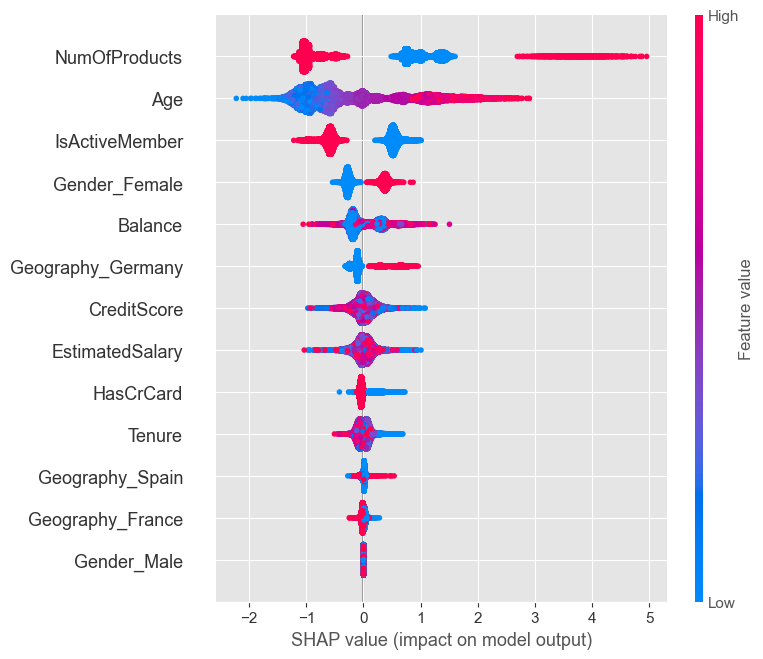

In [76]:
shap.summary_plot(shap_values, X_test_scaled,max_display=100)

- Guidelines on interpretation:

    - <b>Magnitude:</b> The higher the magnitude, the higher the impact of a feature on the prediction.

    - <b>Direction / sign:</b> 
        - If going to positive X-axis, then values(red/blue or higher/lower) of that feature are moving the predictions to Class 1(Churn) 
        - If going to negative X-axis, then values(red/blue or higher/lower) of that feature are moving the predictions to Class 0(Non-Churn) 

<a id='conclusion'></a>
### Conclusion
[Back to top](#back-to-top) <br>

With all the steps mentioned above, the following can be concluded: <br>
1) The customers that churn are mainly influenced by:
    - Age - as customers start to get older it seems they are more likely to churn
       -  A larger positive SHAP value (+4) indicates a stronger push towards a positive prediction compared to a negative value (-2). However, it doesn't always guarantee a positive prediction (Churn).
       
    - The rest of the feature seems to have mixed impact as they have overlapping values, this may indicated a complex and
    non-linear relation ship with the target variable.

    - Imagine a model predicting house prices based on square footage (variable).

        - Linear relationship (not complex): 
            - Every additional square foot increases the predicted price by a constant amount, regardless of the starting size of the house.
        
        - Non-linear relationship (potentially complex):
    
            - As square footage increases, the price might increase more rapidly for larger houses (curved line).
            There might be a threshold where houses above a certain size see a diminishing return on investment (flat line or even a decrease).
    
            - The impact of square footage on price could be stronger in certain locations (interaction with another feature).


 
2) Baseline model (XGB) is performing with a test recall/sensitivity of 73%. 
    - The recall is the measure of our model correctly identifying True Positives. Thus, for all the customers who actually churned, recall tells us how many we correctly identified as customer churns.
    - It means for every 100 customers churning, we are able to correctly identify 73 of them.


3) In line with these findings, the following are recommended:
    - Add new features that are more relevant to customer churn, or maybe create new features (Feature Engineering)
    - Combine other classification models to improve Recall(Ensemble i.e. 'VotingClassifier')
    - Split the data into different subgroups, then create a model for each subgroup, as maybe this can improve the models predictive capability